In [80]:
# import libraries
import pandas as pandas
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [81]:
# Load data of Mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

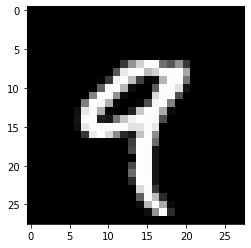

In [82]:
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))

In [83]:
## Working with the input
# Reshape the data train and the data test
number_images_train=X_train.shape[0]
number_images_test=X_test.shape[0]
X_train_reshape=X_train.reshape((number_images_train,28,28,1)).astype('float32')
X_test_reshape=X_test.reshape((number_images_test,28,28,1)).astype('float32')

# Normalize data
X_train_reshape = X_train_reshape/255 # Change black-white from 0-255 to 0-1
X_test_reshape = X_test_reshape/255 # Change black-white from 0-255 to 0-1

## Working with the output
# Transform to categorical
y_train_categorical = np_utils.to_categorical(y_train)
y_test_categorical = np_utils.to_categorical(y_test)


In [89]:
# Create a model
model = Sequential()
model.add(Conv2D(32,(5,5), input_shape = (28,28,1), activation = 'relu')) # Capa convolucional
model.add(MaxPooling2D()) # Max pooling
model.add(Dropout(0.2)) # Dropout
model.add(Flatten()) # Paso a perceptrón
model.add(Dense(128, activation='relu')) # Capa densa 128
model.add(Dense(64, activation='relu')) # Capa densa 64
model.add(Dense(10,activation='softmax')) # Capa salida

In [90]:
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [92]:
# Fit the model
model.fit(X_train_reshape,y_train_categorical, validation_data=(X_test_reshape,y_test_categorical), epochs=100, batch_size=200, verbose=2)

# Evaluation
scores=model.evaluate(X_test_reshape,y_test_categorical, verbose=2)
print("El error del modelo es {}%".format(100-scores[1]*100))

Epoch 1/100
300/300 - 25s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0751 - val_accuracy: 0.9896
Epoch 2/100
300/300 - 25s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0688 - val_accuracy: 0.9904
Epoch 3/100
300/300 - 25s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0732 - val_accuracy: 0.9898
Epoch 4/100
300/300 - 25s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0682 - val_accuracy: 0.9908
Epoch 5/100
300/300 - 25s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0766 - val_accuracy: 0.9898
Epoch 6/100
300/300 - 25s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0717 - val_accuracy: 0.9905
Epoch 7/100
300/300 - 25s - loss: 9.3482e-04 - accuracy: 0.9997 - val_loss: 0.0682 - val_accuracy: 0.9908
Epoch 8/100
300/300 - 25s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0750 - val_accuracy: 0.9905
Epoch 9/100
300/300 - 25s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0760 - val_accuracy: 0.9903
Epoch 10/100
300/300 - 25s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.069